In [30]:
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from skimage.transform import resize
from skimage.io import imread
from sklearn.metrics import ConfusionMatrixDisplay

In [28]:
pip install opencv-contrib-python

   ---------------------------------------- 0.0/45.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/45.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/45.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/45.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/45.5 MB ? eta -:--:--
   ---------------------------------------- 0.3/45.5 MB ? eta -:--:--
   ---------------------------------------- 0.5/45.5 MB 399.6 kB/s eta 0:01:53
    --------------------------------------- 0.8/45.5 MB 508.5 kB/s eta 0:01:29
    --------------------------------------- 0.8/45.5 MB 508.5 kB/s eta 0:01:29
    --------------------------------------- 0.8/45.5 MB 508.5 kB/s eta 0:01:29
    --------------------------------------- 1.0/45.5 MB 508.4 kB/s eta 0:01:28
    --------------------------------------- 1.0/45.5 MB 508.4 kB/s eta 0:01:28
   - -------------------------------------- 1.3/45.5 MB 508.5 kB/s eta 0:01:27
   - ----------------------

In [2]:
Categories=['NORMAL','PNEUMONIA']

In [3]:
def load_image(datadir, Categories):

    flat_data_arr=[]
    target_arr=[]

    for i in Categories:

        print(f'loading... category : {i}')
        path=os.path.join(datadir,i)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(150,150,3))
            flat_data_arr.append(img_resized.flatten())
            target_arr.append(Categories.index(i))
        print(f'loaded category:{i} successfully')

    flat_data=np.array(flat_data_arr)
    target=np.array(target_arr)

    df=pd.DataFrame(flat_data)
    df['Target']=target

    x=df.iloc[:,:-1]
    y=df.iloc[:,-1]
    return x, y

In [4]:
datadir = 'D:/github/archive/chest_xray/train'
X, y = load_image(datadir, Categories)


loading... category : NORMAL
loaded category:NORMAL successfully
loading... category : PNEUMONIA
loaded category:PNEUMONIA successfully


In [5]:
datadir2 = 'D:/github/archive/chest_xray/test'
X_test2, y_test2 = load_image(datadir2, Categories)

loading... category : NORMAL
loaded category:NORMAL successfully
loading... category : PNEUMONIA
loaded category:PNEUMONIA successfully


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
decision_tree = tree.DecisionTreeClassifier()

In [8]:
decision_tree.fit(X_train, y_train)

print("Decision Tree Accuracy Score: ", decision_tree.score(X_test, y_test))

Decision Tree Accuracy Score:  0.8913738019169329


[Text(0.6316964285714286, 0.9852941176470589, 'x[66152] <= 0.0\ngini = 0.377\nsamples = 3651\nvalue = [921, 2730]'),
 Text(0.39203042328042326, 0.9558823529411765, 'x[211] <= 0.771\ngini = 0.496\nsamples = 1400\nvalue = [760, 640]'),
 Text(0.16071428571428573, 0.9264705882352942, 'x[767] <= 0.102\ngini = 0.452\nsamples = 802\nvalue = [277, 525]'),
 Text(0.031746031746031744, 0.8970588235294118, 'x[62625] <= 0.464\ngini = 0.245\nsamples = 105\nvalue = [90, 15]'),
 Text(0.021164021164021163, 0.8676470588235294, 'gini = 0.0\nsamples = 8\nvalue = [0, 8]'),
 Text(0.042328042328042326, 0.8676470588235294, 'x[43826] <= 0.673\ngini = 0.134\nsamples = 97\nvalue = [90, 7]'),
 Text(0.031746031746031744, 0.8382352941176471, 'x[26706] <= 0.525\ngini = 0.081\nsamples = 94\nvalue = [90, 4]'),
 Text(0.021164021164021163, 0.8088235294117647, 'x[26142] <= 0.02\ngini = 0.043\nsamples = 92\nvalue = [90, 2]'),
 Text(0.010582010582010581, 0.7794117647058824, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text

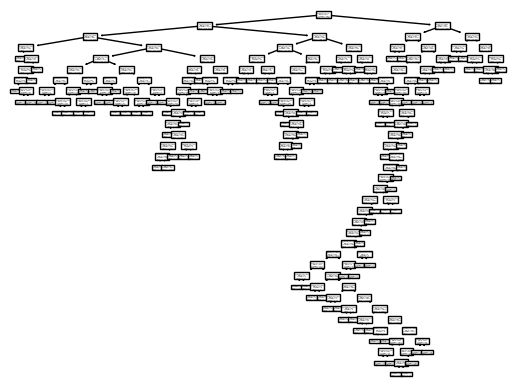

In [9]:
tree.plot_tree(decision_tree)

In [10]:
print("Decision Tree Accuracy Score using test data: ", decision_tree.score(X_test2, y_test2))

Decision Tree Accuracy Score using test data:  0.7467948717948718


In [11]:
y_pred = decision_tree.predict(X_test)
y_pred2 = decision_tree.predict(X_test2)

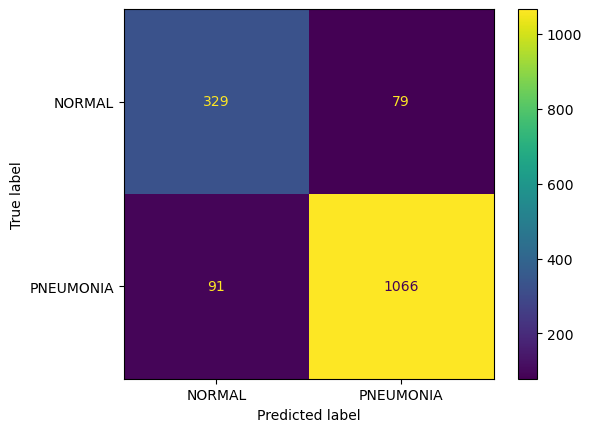

In [12]:
cm1 = confusion_matrix(y_pred, y_test)
ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=Categories).plot()

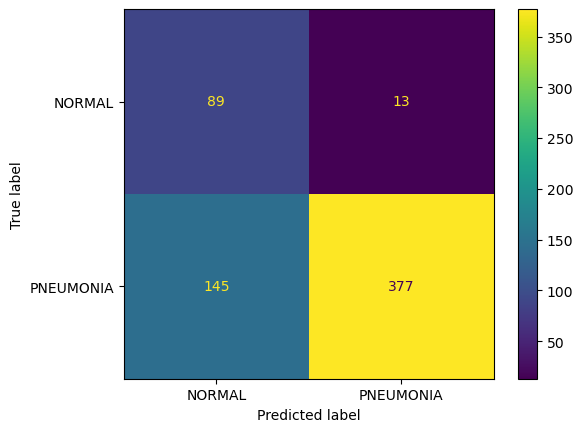

In [13]:
cm2 = confusion_matrix(y_pred2, y_test2)
ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=Categories).plot()

In [14]:
print(classification_report(y_test, y_pred, target_names=Categories))

              precision    recall  f1-score   support

      NORMAL       0.81      0.78      0.79       420
   PNEUMONIA       0.92      0.93      0.93      1145

    accuracy                           0.89      1565
   macro avg       0.86      0.86      0.86      1565
weighted avg       0.89      0.89      0.89      1565



In [15]:
print(classification_report(y_test2, y_pred2, target_names=Categories))

              precision    recall  f1-score   support

      NORMAL       0.87      0.38      0.53       234
   PNEUMONIA       0.72      0.97      0.83       390

    accuracy                           0.75       624
   macro avg       0.80      0.67      0.68       624
weighted avg       0.78      0.75      0.72       624



Enter URL of Image : D:\github\archive\chest_xray\test\NORMAL\IM-0031-0001.jpeg


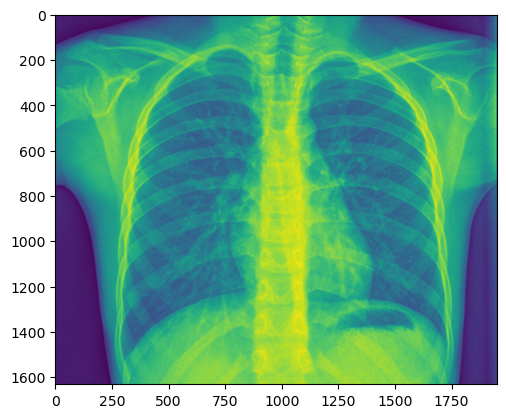

NORMAL = 0.0%
PNEUMONIA = 100.0%
The predicted image is : PNEUMONIA


In [33]:
url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=decision_tree.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[decision_tree.predict(l)[0]])

Enter URL of Image : D:\github\archive\chest_xray\test\PNEUMONIA\person29_virus_64.jpeg


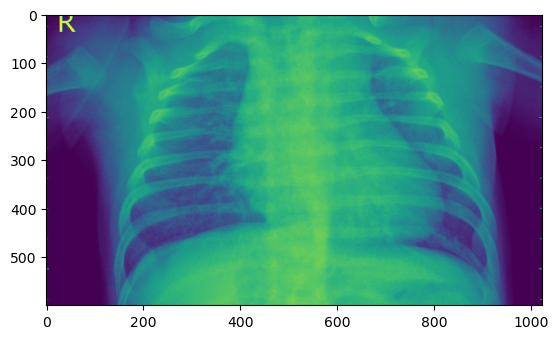

NORMAL = 0.0%
PNEUMONIA = 100.0%
The predicted image is : PNEUMONIA


In [32]:
url=input('Enter URL of Image :')
img=imread(url)
#img = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
img_resize=resize(img,(150,150,3))
plt.imshow(img)
plt.show()
l=[img_resize.flatten()]
probability=decision_tree.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[decision_tree.predict(l)[0]])